In [1]:
import gymnasium as gym
import numpy as np
import random

In [ ]:
#### Q-learning ####
env = gym.make("Taxi-v3")

def train(total_ep=1000, lr = 0.5, gamma = 0.99):
  state_space_size = env.observation_space.n
  action_space_size = env.action_space.n
  q_table = np.zeros((state_space_size, action_space_size))
  rewards = []
  steps_used = []

  max_steps = 100
  epsilon = 1.0
  max_epsilon = 1.0
  min_epsilon = 0.01
  decay_rate = 0.005

  for episode in range(total_ep):
      state, _ = env.reset()
      done = False
      total_rewards = 0  

      for step in range(max_steps):
          exp_exp_tradeoff = random.uniform(0, 1)

          if exp_exp_tradeoff > epsilon:
              action = np.argmax(q_table[state, :])
          else:
              action = env.action_space.sample()

          new_state, reward, terminated, truncated, info = env.step(action)
          done = terminated or truncated

          # Q-learning
          q_table[state, action] = q_table[state, action] + lr * (
              reward + gamma * np.max(q_table[new_state, :]) - q_table[state, action]
          )

          total_rewards += reward  
          state = new_state

          if done:
              break

      steps_used.append(step)
      rewards.append(total_rewards) 

      # Epsilon Decay
      epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
  return rewards, steps_used, q_table


In [5]:
rewards_1, steps_used_1, q_table_1 = train(total_ep=2000, lr = 0.01, gamma = 0.99)
rewards_2, steps_used_2, q_table_2 = train(total_ep=2000, lr = 0.1, gamma = 0.99)
rewards_3, steps_used_3, q_table_3 = train(total_ep=2000, lr = 0.5, gamma = 0.99)
rewards_4, steps_used_4, q_table_4 = train(total_ep=2000, lr = 1, gamma = 0.99)

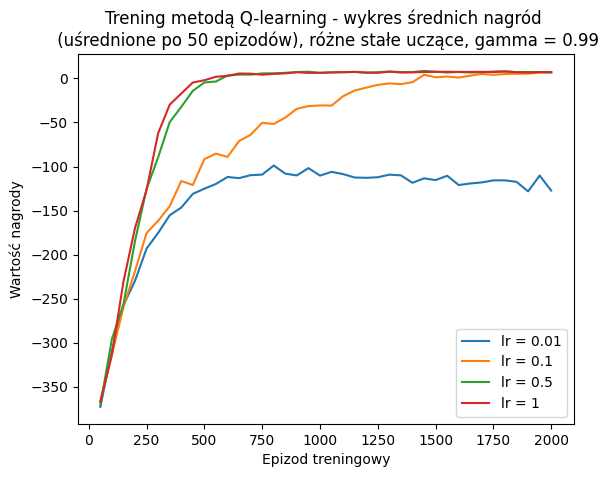

In [11]:
import matplotlib.pyplot as plt
mean_reward_total = np.mean(np.array(rewards_1))
moving_average_1 = [np.mean(np.array(rewards_1[50*i:50*(i+1)])) for i in range(int(len(rewards_1)/50))]
moving_average_2 = [np.mean(np.array(rewards_2[50*i:50*(i+1)])) for i in range(int(len(rewards_2)/50))]
moving_average_3 = [np.mean(np.array(rewards_3[50*i:50*(i+1)])) for i in range(int(len(rewards_3)/50))]
moving_average_4 = [np.mean(np.array(rewards_4[50*i:50*(i+1)])) for i in range(int(len(rewards_4)/50))]
domain = list(range(25,len(rewards_1),50))
#plt.plot(domain,moving_average)

x = list(range(50,2001,50))
plt.plot(x, moving_average_1, label='lr = 0.01')
plt.plot(x, moving_average_2, label='lr = 0.1')
plt.plot(x, moving_average_3, label='lr = 0.5')
plt.plot(x, moving_average_4, label='lr = 1')
plt.title(f"Trening metodą Q-learning - wykres średnich nagród \n (uśrednione po 50 epizodów), różne stałe uczące, gamma = 0.99")
plt.xlabel('Epizod treningowy')
plt.ylabel('Wartość nagrody')
plt.legend()
plt.savefig(f"Mean_reward_taxi_lr.png")
plt.show()

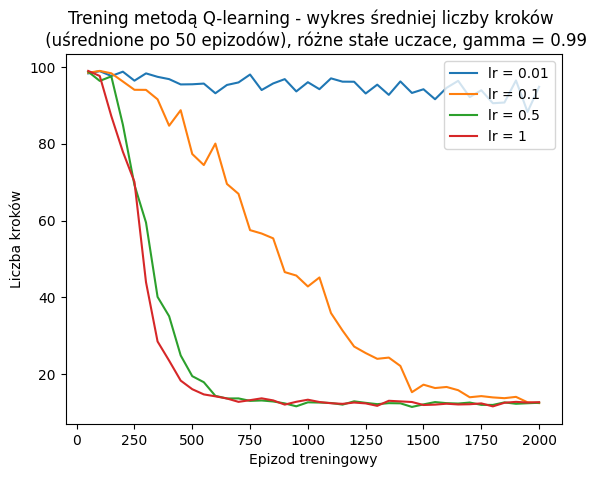

In [12]:

steps_average_1 = [np.mean(np.array(steps_used_1[50*i:50*(i+1)])) for i in range(int(len(steps_used_1)/50))]
steps_average_2 = [np.mean(np.array(steps_used_2[50*i:50*(i+1)])) for i in range(int(len(steps_used_2)/50))]
steps_average_3 = [np.mean(np.array(steps_used_3[50*i:50*(i+1)])) for i in range(int(len(steps_used_3)/50))]
steps_average_4 = [np.mean(np.array(steps_used_4[50*i:50*(i+1)])) for i in range(int(len(steps_used_4)/50))]
plt.plot(x, steps_average_1, label='lr = 0.01')
plt.plot(x, steps_average_2, label='lr = 0.1')
plt.plot(x, steps_average_3, label='lr = 0.5')
plt.plot(x, steps_average_4, label='lr = 1')
plt.title(f"Trening metodą Q-learning - wykres średniej liczby kroków \n (uśrednione po 50 epizodów), różne stałe uczace, gamma = 0.99")
plt.xlabel('Epizod treningowy')
plt.ylabel('Liczba kroków')
plt.legend(loc='upper right')
plt.savefig(f"Mean_steps_taxi_lr.png")
plt.show()
# Dobrze nauczony agent nie powinien przekraczać 20 kroków do wykonania zadania

In [13]:
rewards_1, steps_used_1, q_table_1 = train(total_ep=2000, lr = 0.5, gamma = 0.99)
rewards_2, steps_used_2, q_table_2 = train(total_ep=2000, lr = 0.5, gamma = 0.9)
rewards_3, steps_used_3, q_table_3 = train(total_ep=2000, lr = 0.5, gamma = 0.5)
rewards_4, steps_used_4, q_table_4 = train(total_ep=2000, lr = 0.5, gamma = 0.1)

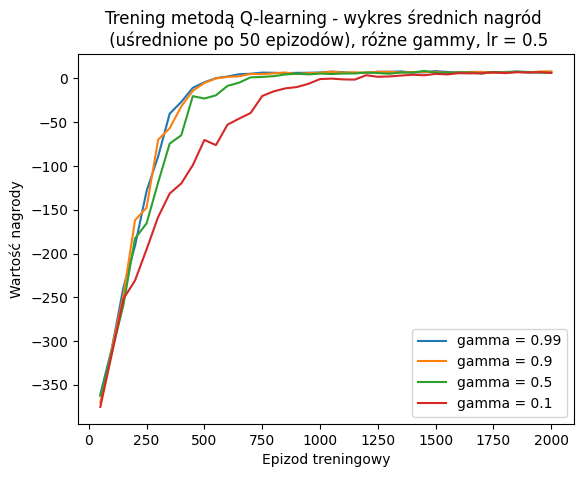

In [14]:
import matplotlib.pyplot as plt
mean_reward_total = np.mean(np.array(rewards_1))
moving_average_1 = [np.mean(np.array(rewards_1[50*i:50*(i+1)])) for i in range(int(len(rewards_1)/50))]
moving_average_2 = [np.mean(np.array(rewards_2[50*i:50*(i+1)])) for i in range(int(len(rewards_2)/50))]
moving_average_3 = [np.mean(np.array(rewards_3[50*i:50*(i+1)])) for i in range(int(len(rewards_3)/50))]
moving_average_4 = [np.mean(np.array(rewards_4[50*i:50*(i+1)])) for i in range(int(len(rewards_4)/50))]
domain = list(range(25,len(rewards_1),50))
#plt.plot(domain,moving_average)

x = list(range(50,2001,50))
plt.plot(x, moving_average_1, label='gamma = 0.99')
plt.plot(x, moving_average_2, label='gamma = 0.9')
plt.plot(x, moving_average_3, label='gamma = 0.5')
plt.plot(x, moving_average_4, label='gamma = 0.1')
plt.title(f"Trening metodą Q-learning - wykres średnich nagród \n (uśrednione po 50 epizodów), różne gammy, lr = 0.5")
plt.xlabel('Epizod treningowy')
plt.ylabel('Wartość nagrody')
plt.legend()
plt.savefig(f"Mean_reward_taxi_gamma.png")
plt.show()

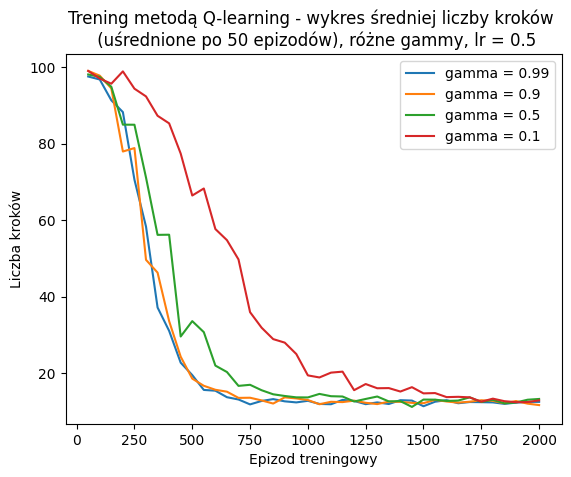

In [15]:

steps_average_1 = [np.mean(np.array(steps_used_1[50*i:50*(i+1)])) for i in range(int(len(steps_used_1)/50))]
steps_average_2 = [np.mean(np.array(steps_used_2[50*i:50*(i+1)])) for i in range(int(len(steps_used_2)/50))]
steps_average_3 = [np.mean(np.array(steps_used_3[50*i:50*(i+1)])) for i in range(int(len(steps_used_3)/50))]
steps_average_4 = [np.mean(np.array(steps_used_4[50*i:50*(i+1)])) for i in range(int(len(steps_used_4)/50))]
plt.plot(x, steps_average_1, label='gamma = 0.99')
plt.plot(x, steps_average_2, label='gamma = 0.9')
plt.plot(x, steps_average_3, label='gamma = 0.5')
plt.plot(x, steps_average_4, label='gamma = 0.1')
plt.title(f"Trening metodą Q-learning - wykres średniej liczby kroków \n (uśrednione po 50 epizodów), różne gammy, lr = 0.5")
plt.xlabel('Epizod treningowy')
plt.ylabel('Liczba kroków')
plt.legend(loc='upper right')
plt.savefig(f"Mean_steps_taxi_gamma.png")
plt.show()
# Dobrze nauczony agent nie powinien przekraczać 20 kroków do wykonania zadania

In [ ]:

env = gym.make("Taxi-v3", render_mode="ansi") 
total_test_ep = 1
max_steps = 100
rewards = []

for episode in range(total_test_ep):
    state, _ = env.reset() 
    done = False
    total_rewards = 0
    print('=========================')
    print('EPISODE: ', episode)

    for step in range(max_steps):
        print(env.render())  

        action = np.argmax(q_table_3[state, :])
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        total_rewards += reward

        if done:
            print('Score: ', total_rewards)
            break

        state = new_state

    rewards.append(total_rewards)

env.close()
print('Average Score Over Time: {:.2f}'.format(sum(rewards) / total_test_ep))


EPISODE:  0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_

In [ ]:
import gymnasium as gym
import imageio
import numpy as np

env = gym.make("Taxi-v3", render_mode="rgb_array")
obs, info = env.reset()
frames = []

done = False
while not done:
    frames.append(env.render()) 
    action = np.argmax(q_table_3[obs])
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.close()
imageio.imwrite('frame_taxi.png', frames[0])
imageio.mimsave("taxi_agent.gif", frames, fps=1)


ModuleNotFoundError: No module named 'imageio'

In [ ]:
test_episodes = 10
for ep in range(test_episodes):
    state, _ = env.reset()
    total_reward = 0
    done = False
    print(f"Episode {ep+1}")
    while not done:
        action = np.argmax(q_table_3[state, :])
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        total_reward += reward
        env.render()
    print(f"Total reward: {total_reward}\n")
env.close()
